**Your turn.** Encode $\mathbf{x}^{(1)}=(4,8,5)$ using 4 bits per feature.

- Write code to build the corresponding quantum circuit with $12$ qubits.  
- Hint: follow the exact pattern above (format to 4-bit binary, append, apply `x` on 1s).


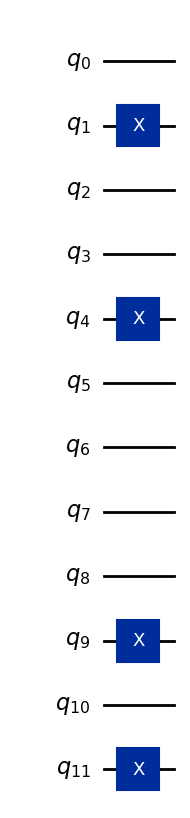

In [1]:
from qiskit import QuantumCircuit

# Given vector
x1 = 4  # 0100
y1 = 8  # 1000
z1 = 5  # 0101

# Convert to 4-bit binary
x_bits = [int(b) for b in format(x1, "04b")]
y_bits = [int(b) for b in format(y1, "04b")]
z_bits = [int(b) for b in format(z1, "04b")]

# Combine all bits
all_bits = x_bits + y_bits + z_bits

# Create a 12-qubit circuit
qc_encode = QuantumCircuit(12)

# Apply X gate to qubits corresponding to 1 bits
for idx, bit in enumerate(all_bits):
    if bit == 1:
        qc_encode.x(idx)

# Draw the circuit
qc_encode.draw("mpl")


**Your turn A.** Normalize and write the state $|\psi_{\mathbf{x}}\rangle$ for $\mathbf{x}=(9,8,6,2,9,2)$.  
*(Just compute the normalization constant and list the amplitudes; you can print them.)*

**Your turn B.** Build a circuit using `initialize` that loads the normalized amplitudes for $\mathbf{x}=(9,8,6,2,9,2)$.  
- Choose $n$ with $2^n \ge 6$ and **pad with zeros** to length $2^n$.


Normalization constant = 16.431676725154983
Normalized amplitudes (length 6) =
0.5477225575051662
0.48686449556014766
0.36514837167011077
0.12171612389003691
0.5477225575051662
0.12171612389003691

Padded state (length 8) =
0.5477225575051662
0.48686449556014766
0.36514837167011077
0.12171612389003691
0.5477225575051662
0.12171612389003691
0.0
0.0


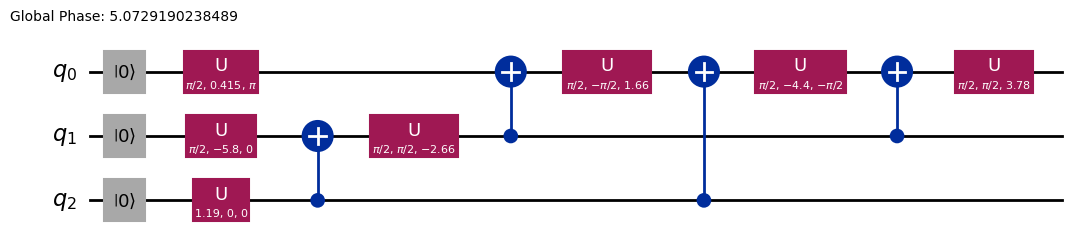

In [2]:
# --- Your turn A & B: (9,8,6,2,9,2) ---
import math
from qiskit import QuantumCircuit

# A) Normalize and list amplitudes
x = [9, 8, 6, 2, 9, 2]  # length = 6
norm = math.sqrt(sum(v*v for v in x))   # √270
amps = [v / norm for v in x]

print("Normalization constant =", norm)
print("Normalized amplitudes (length 6) =")
for a in amps:
    print(a)

# B) Pad to length 2^n and build circuit with initialize
# choose n with 2^n >= 6 -> n = 3 (length 8)
n = 3
pad_len = 2**n
state = [v / norm for v in x] + [0.0] * (pad_len - len(x))  # pad with zeros

print("\nPadded state (length 8) =")
for a in state:
    print(a)

qc = QuantumCircuit(n)
qc.initialize(state, list(range(n)))

# optional: show a decomposed circuit
qc_decomp = qc.decompose(reps=5)
qc_decomp.draw("mpl")


**Your turn.** Encode $\mathbf{x}=(0,\pi/4,\pi/2)$ using angle encoding on three qubits (depth $\approx 1$ before transpilation).  
- Build a circuit with `ry(2*x_k)` or `ry(x_k)` consistently with the formula above.


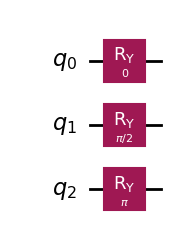

In [3]:
from qiskit import QuantumCircuit
from math import pi

# Given vector
x = [0, pi/4, pi/2]

# Create a 3-qubit circuit
qc_angle = QuantumCircuit(3)

# Apply Ry rotations with 2*x_k (consistent with example)
for k, val in enumerate(x):
    qc_angle.ry(2 * val, k)

# Draw circuit
qc_angle.draw("mpl")


**Your turn A.** How many qubits are needed to phase-encode 8 features? *(Answer in a markdown cell below.)*

**Your turn B.** Phase-encode $\mathbf{x}=(4,8,5,9,8,6,2,9,2,5,7,0)$  
(treat numbers as raw angles; in practice rescale to $(0, 2\pi]$).


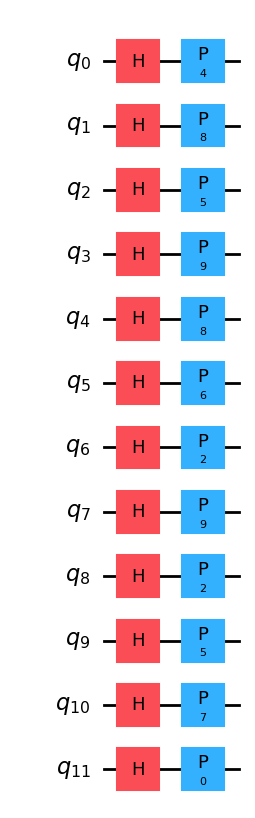

In [4]:
# --- Your turn A ---
# To phase-encode 8 features, we need 8 qubits.
# Each qubit can carry one phase rotation corresponding to one feature.

# --- Your turn B ---
from qiskit import QuantumCircuit
from math import pi

# Given vector (treated as raw angles)
x = [4, 8, 5, 9, 8, 6, 2, 9, 2, 5, 7, 0]

# Create circuit with one qubit per feature
qc_phase = QuantumCircuit(len(x))

# Apply Hadamard + Phase encoding
for k, val in enumerate(x):
    qc_phase.h(k)
    qc_phase.p(val, k)

# Draw circuit
qc_phase.draw("mpl")


**Your turn.** DAE-encode $\mathbf{x}=(4,8,5,9,8,6,2,9,2,5,7,0,3,7,5)$.  
- Use one qubit per pair $(x_{2k-1}, x_{2k})$: apply `ry(x_{2k-1})` then `rz(x_{2k})`.


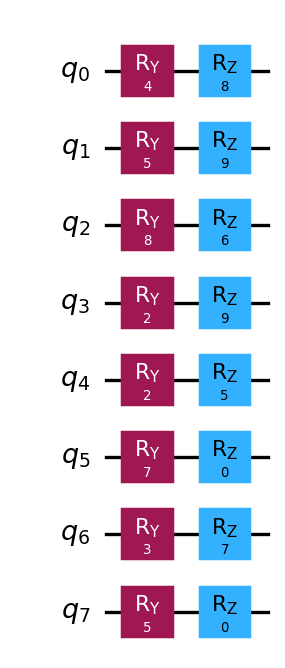

In [5]:
x = [4,8,5,9,8,6,2,9,2,5,7,0,3,7,5]
n_qubits = (len(x)+1)//2
qc_dae = QuantumCircuit(n_qubits)
for k in range(n_qubits):
    theta = x[2*k]
    phi   = x[2*k+1] if 2*k+1 < len(x) else 0.0  # pad last phi if odd length
    qc_dae.ry(theta, k)
    qc_dae.rz(phi, k)

qc_dae.draw("mpl", scale=1.2)


**Your turn.** Encode  
$\mathbf{x} = (0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3)$  
using an `EfficientSU2` circuit with 3 qubits, `reps=1`, and `insert_barriers=True`.  
Assign parameters to $\mathbf{x}$ and draw the decomposed circuit.

C:\Users\think\AppData\Local\Temp\ipykernel_41148\1405431953.py:7: DeprecationWarning: The class ``qiskit.circuit.library.n_local.efficient_su2.EfficientSU2`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.efficient_su2 instead.
  ansatz = EfficientSU2(num_qubits=3, reps=1, insert_barriers=True)


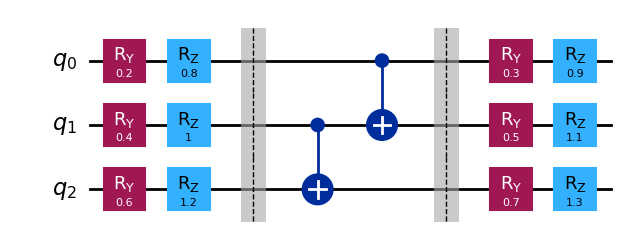

In [6]:
from qiskit.circuit.library import EfficientSU2

# Parameters to load (length 12)
x = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3]

# EfficientSU2 ansatz: 3 qubits, single repetition, with barriers
ansatz = EfficientSU2(num_qubits=3, reps=1, insert_barriers=True)

# Assign parameters and draw decomposed circuit
encoded = ansatz.assign_parameters(x)
encoded.decompose().draw(output="mpl")


**Your turn.** Encode  $\mathbf{x} = \left(\tfrac{\pi}{4}, \tfrac{\pi}{5}, \tfrac{\pi}{6}\right)$ using a `z_feature_map` circuit with 3 qubits and `reps=2`.  
Assign parameters properly and draw the decomposed circuit.

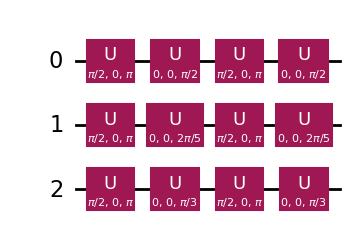

In [7]:
from qiskit.circuit.library import z_feature_map
from math import pi

# Given vector
x = [pi/4, pi/5, pi/6]

# Create z_feature_map circuit with 3 qubits and 2 repetitions
zmap = z_feature_map(feature_dimension=3, reps=2)

# Assign parameters
zmap = zmap.assign_parameters(x)

# Draw decomposed circuit
zmap.decompose().draw("mpl")


**Your turn.** Create a `zz_feature_map` circuit for $\mathbf{x} = (0.5\pi, 0.3\pi, 0.7\pi)$ using **3 qubits**, `reps=2`, and **circular entanglement**.  
Decompose the circuit and visualize it.

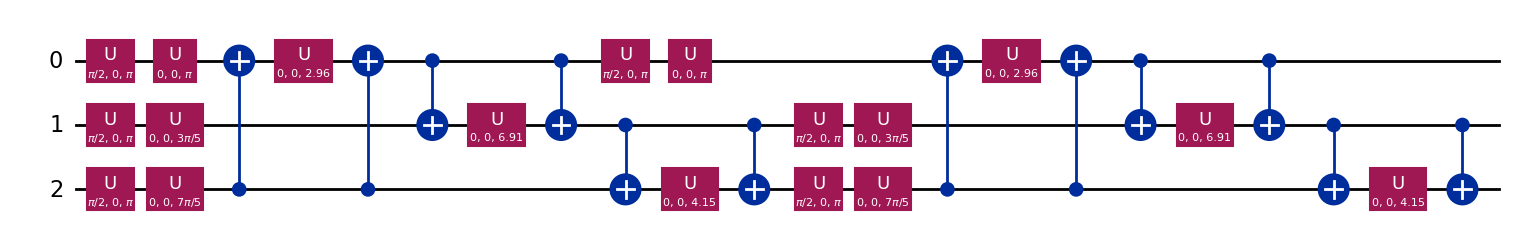

In [8]:
from qiskit.circuit.library import zz_feature_map
from math import pi

# Given vector
x = [0.5 * pi, 0.3 * pi, 0.7 * pi]

# Create zz_feature_map circuit with 3 qubits, 2 repetitions, circular entanglement
zzmap = zz_feature_map(
    feature_dimension=3,
    reps=2,
    entanglement="circular"
)

# Assign parameters
zzmap = zzmap.assign_parameters(x)

# Decompose and visualize
zzmap.decompose().draw("mpl")


**Your turn.** Create a `pauli_feature_map` circuit with  `feature_dimension=4`, `paulis=["Z", "YZ"]`, and `reps=2`.  
Use `"circular"` entanglement and draw the decomposed circuit.

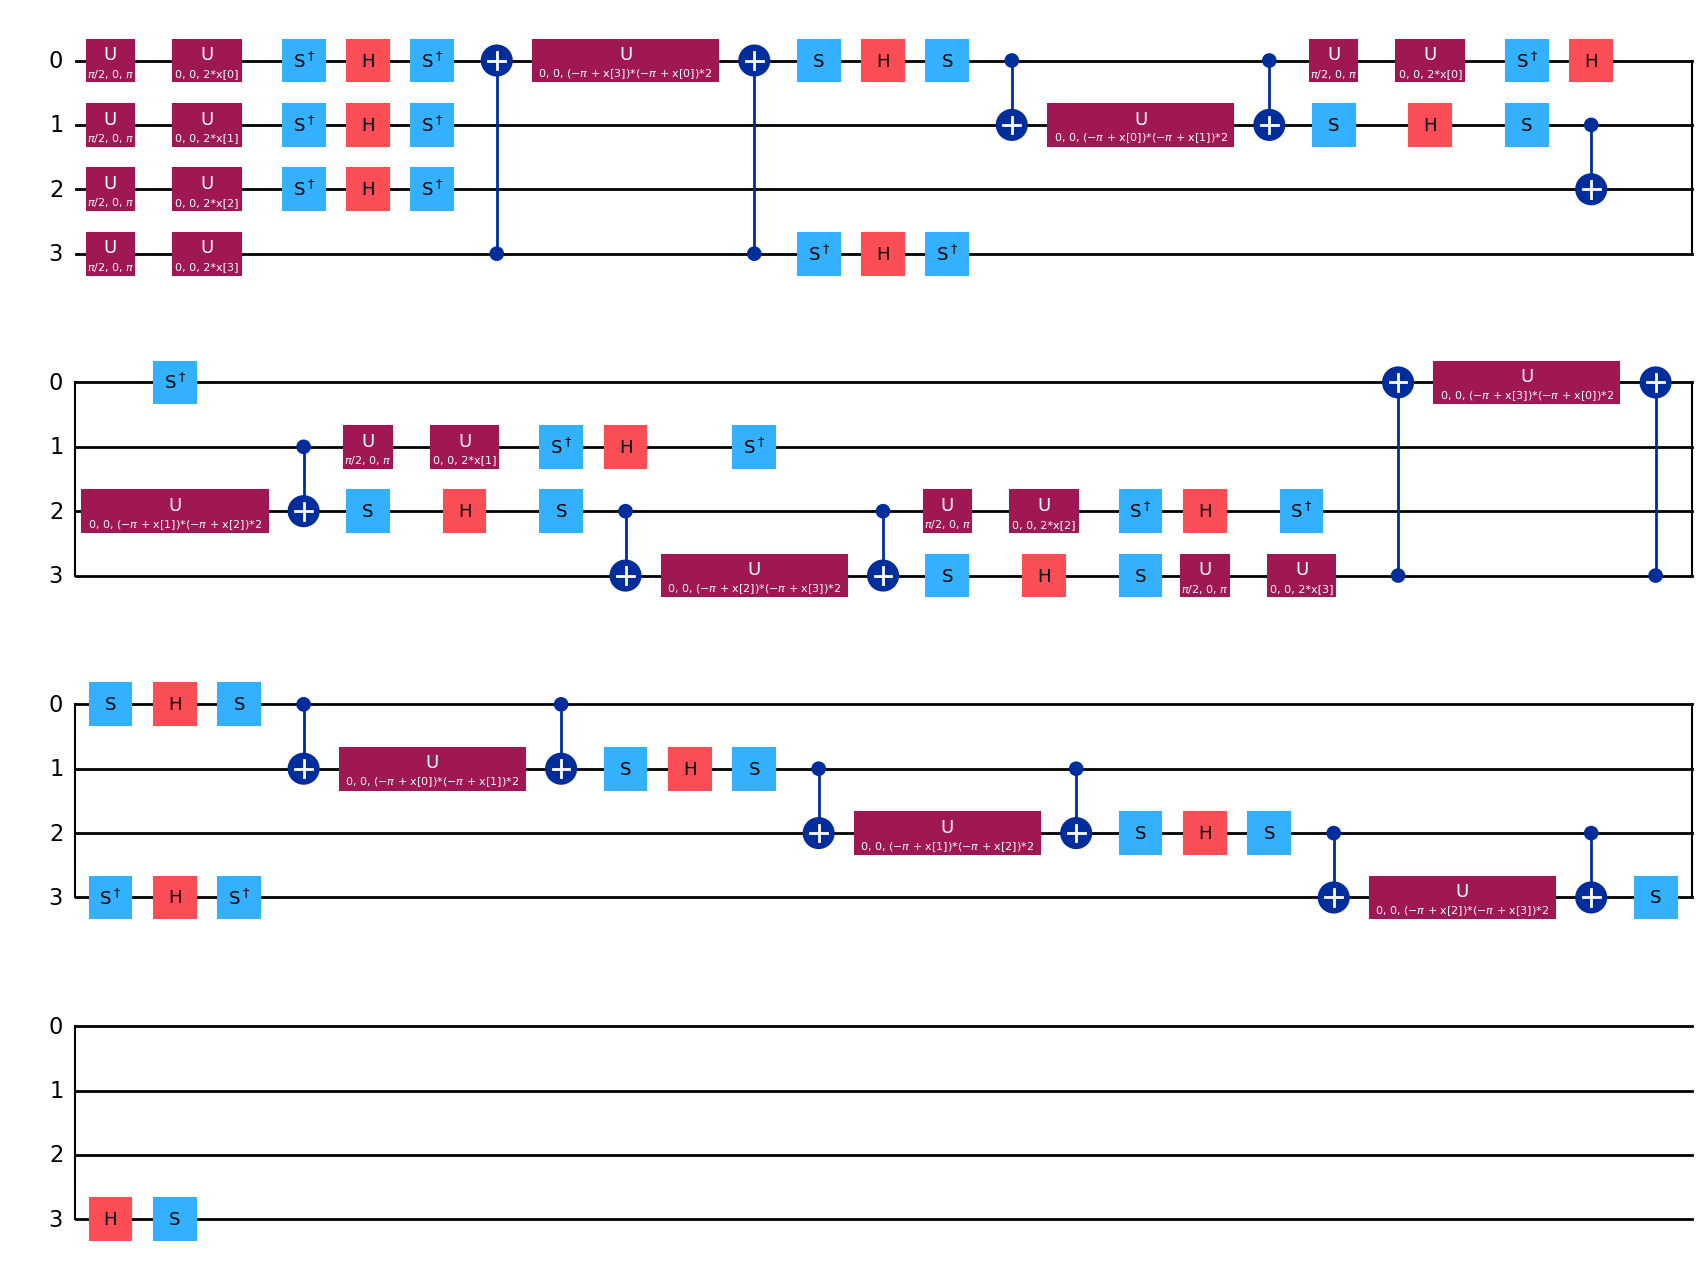

In [9]:
from qiskit.circuit.library import pauli_feature_map

# Create a PauliFeatureMap with given specifications
pfmap = pauli_feature_map(
    feature_dimension=4,
    paulis=["Z", "YZ"],
    reps=2,
    entanglement="circular"
)

# Decompose and draw the circuit
pfmap.decompose().draw("mpl")


Wrap-up — Answer Key (QML_Feature_Encoding)
1. B. Because encoding transforms classical inputs into quantum states in a higher-dimensional Hilbert space
2. B. The presence and complexity of entanglement between qubits
3. B. It encodes correlations between features, enabling richer representations
4. C. It defines an exponentially large space ($2^n$) for data representation
5. B. Deeper circuits can introduce noise and reduce trainability
6. A. Rotation-based encodings use gate angles, while amplitude encoding embeds data in quantum amplitudes
7. B. It unifies ZFM and ZZFM by allowing arbitrary Pauli operators for feature interactions

---

Wrap-up — Answer Key (Quantum_Kernels)

1. B. To embed classical data into a high-dimensional Hilbert space for better separability
2. C. Because the amplitude of |0⟩<sup>⊗N</sup> represents ⟨ψ(x<sub>j</sub>)|ψ(x<sub>i</sub>)⟩
3. B. It enables encoding of correlated features between qubits
4. B. Each qubit doubles the state space dimension, allowing richer representations
5. C. Deeper circuits are more expressive but also noisier
6. B. To minimize depth and errors through advanced optimizations
7. B. It uses quantum feature maps to embed data into exponentially larger spaces
8. B. Each repetition changes feature interactions and the Hilbert space embedding
9. A. It supports more qubits than hardware and avoids noise
10. A. It is used as input to kernel-based models like SVMs

---

Wrap-up — Answer Key (VQC_QNN)

1. B. To introduce tunable parameters that can be optimized for a cost function
2. B. It directly computes expectation values of observables
3. C. It compresses the quantum state to handle limited entanglement efficiently
4. B. It specifies what quantity the circuit measures and optimizes against
5. B. It does not require gradient information and handles noisy objectives well
6. C. Fewer shots increase noise but run faster, while more shots give smoother results
7. C. Deeper circuits capture more correlations but are harder to train and noisier
8. B. Some circuits efficient in simulation may be too deep or use unsupported gates on real devices